C:\Users\kanha\AppData\Local\Temp\ipykernel_18436\3730382899.py:33: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  y = x.dot(w)


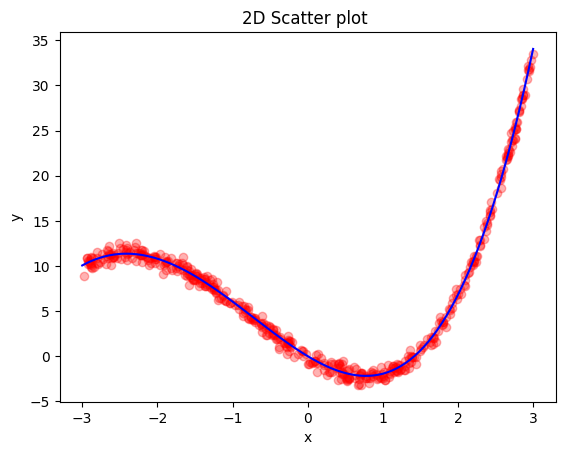

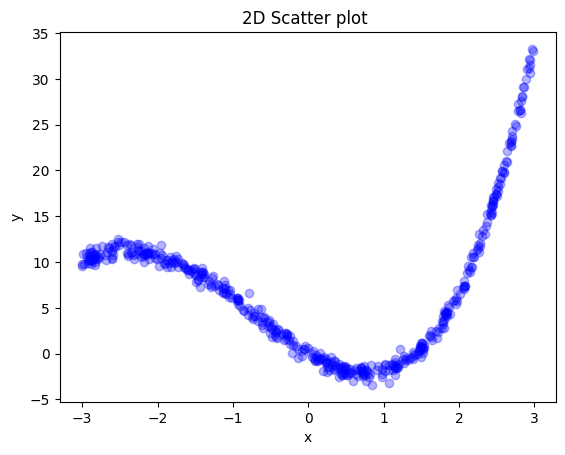

In [2]:
# -*- coding: utf-8 -*-
"""UAssignment 1.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1v55kaL1i7OT1YXE5jXS-ixAkNoRsnZCu
"""

import numpy as np
import matplotlib . pyplot as plt
import torch

# Use the following helper code below to visualize the polynomial above (you have to report a figure). 
# Do not forget the 0-th degree coefficient in the argument ‘coeffs.’

def plot_polynomial(coeffs , z_range , color = 'b'):
  z = np.linspace(z_range[0], z_range[1], 100)
  y = np.polynomial.polynomial.polyval(z, coeffs)
  plt.plot(z, y, color)
plot_polynomial([0, -5, 2, 1, 0.05], [-3,3])

# Complete the code below that allows you to generate the data D′ described above.

def create_dataset(w, z_range, sample_size, sigma, seed = 42):
  random_state = np.random.RandomState(seed)
  z = random_state.uniform(z_range[0], z_range[1], (sample_size))
  x = np.zeros((sample_size, w.shape[0]))
  for i in range(sample_size):
     x[i,0] = 1 # this is the first 1 in the xi vector
     for j in range(1, w.shape[0]):
       x[i,j] = pow(z[i], j)
  y = x.dot(w)
  if(sigma > 0):
    y = y + random_state.normal(0.0, sigma, sample_size)
  return x, y

# Use the completed code and the following parameters to generate training and validation data points:

#dataset for training
x_train, y_train = create_dataset(torch.tensor([0,-5,2,1,0.05]).T, torch.tensor([-3, 3]), 500, 0.5, 0)

#dataset for validation
x_validate, y_validate = create_dataset(torch.tensor([0,-5,2,1,0.05]).T, torch.tensor([-3, 3]), 500, 0.5, 1)

# Visualize the generated training data points (i.e., the ‘(z, y)’ pairs) in a 2D scatterplot.

import matplotlib.pyplot as plt

plt.scatter(x_train[:, 1][:, None], y_train, alpha = 0.3, marker = 'o', color = 'r') # we take just the column of x-es so the column with index 1 because index 0 is the bias column
plt.title('2D Scatter plot ')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#  Do the same for the validation set (report two separate figures).


plt.scatter(x_validate[:, 1][:, None], y_validate, alpha = 0.3, marker = 'o', color = 'b') # we take just the column of x-es so the column with index 1 because index 0 is the bias column
plt.title('2D Scatter plot ')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Initial weight values: Parameter containing:
tensor([[-0.2925, -0.3556,  0.0153,  0.3984,  0.4211]], requires_grad=True)
Step 0: train loss: 24.180421829223633
Step 0: val loss: 17.971250534057617
Step 1: train loss: 20.039182662963867
Step 1: val loss: 17.799156188964844
Step 2: train loss: 18.388994216918945
Step 2: val loss: 16.363000869750977
Step 3: train loss: 17.671615600585938
Step 3: val loss: 16.66244125366211
Step 4: train loss: 17.319150924682617
Step 4: val loss: 16.231794357299805
Step 5: train loss: 17.118186950683594
Step 5: val loss: 16.37504005432129
Step 6: train loss: 16.9848575592041
Step 6: val loss: 16.21623992919922
Step 7: train loss: 16.884132385253906
Step 7: val loss: 16.25263023376465
Step 8: train loss: 16.800315856933594
Step 8: val loss: 16.17341423034668
Step 9: train loss: 16.725812911987305
Step 9: val loss: 16.15964126586914
Step 10: train loss: 16.656700134277344
Step 10: val loss: 16.1021785736084
Step 11: train loss: 16.590839385986328
Step 11: va

Text(0, 0.5, 'y')

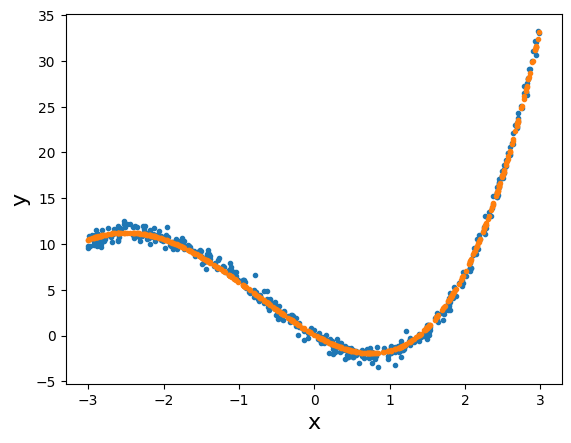

In [3]:
#1. Adapt the code of linear regression in the 1D case presented in the lecture (at the end of Sec.2.1) to perform polynomial regression using the generated training dataset D′.

#2. Find and report a suitable learning rate and number of iterations for gradient descent. 
#3. Report the initial (random) values and the estimate of w you obtained after training.

import torch
import torch.nn as nn 
import torch.optim as optim

DEVICE = torch.device("cuda:0" if torch.cuda.is_available()
else "cpu")

model = nn.Linear(5, 1, bias = False)
model = model.to(DEVICE)
loss_fn = nn.MSELoss()
learning_rate = 0.001
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

sample_size = 500
x_train = torch.from_numpy(x_train)
x_train = x_train.float()
x_train = x_train.to(DEVICE)

y_train = torch.from_numpy(y_train.reshape((sample_size, 1))).float().to(DEVICE)
x_validate = torch.from_numpy(x_validate.reshape((sample_size, 5))).float().to(DEVICE)
y_validate = torch.from_numpy(y_validate.reshape((sample_size, 1))).float().to(DEVICE)

num_steps = 3000
#w0_evolution = []
#w1_evolution = []
#w2_evolution = []
#w3_evolution = []
#w4_evolution = []

print(f"Initial weight values: {model.weight}")

for step in range(num_steps):
  model.train()
  optimizer.zero_grad()
  y_ = model(x_train)
  loss = loss_fn(y_, y_train)
  print(f"Step {step}: train loss: {loss}")

  loss.backward()
  optimizer.step()
  #w0_evolution.append(model.weight[0,0].item())
  #w1_evolution.append(model.weight[0,1].item())
  #w2_evolution.append(model.weight[0,2].item()) 
  #w3_evolution.append(model.weight[0,3].item()) 
  #w4_evolution.append(model.weight[0,4].item()) 

  model.eval()
  with torch.no_grad():
    y_ = model(x_validate)
    val_loss = loss_fn(y_, y_validate)
  
  print(f"Step {step}: val loss: {val_loss}")

print(f"After training weight values: {model.weight}")

model.eval()
with torch.no_grad():
  y_ = model(x_validate)
fig, ax = plt.subplots()

ax.plot(x_validate[:,1].cpu().numpy(), y_validate.cpu().numpy(), ".")
ax.plot(x_validate[:,1].cpu().numpy(), y_.cpu().numpy(), ".")

ax.set_xlabel("x", fontsize=16)
ax.set_ylabel("y", fontsize=16)

In [4]:
# Plot the training and validation losses as a function of the gradient descent iterations.

import torch
import torch.nn as nn 
import torch.optim as optim

DEVICE = torch.device("cuda:0" if torch.cuda.is_available()
else "cpu")

model = nn.Linear(5, 1)
model = model.to(DEVICE)
loss_fn = nn.MSELoss()
learning_rate = 0.001
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

sample_size = 500


loss_validation = []  # create an emply list for the validation loss
loss_training = [] # create an empty list for training loss

num_steps = 3000
for step in range(num_steps):
  model.train() 
  optimizer.zero_grad() 
  y_ = model(x_train) 
  loss = loss_fn(y_, y_train) 
  loss_training.append(loss) # append the loss of the training on each step of the iteration at the end of the list 
  print(f"Step {step}: train loss: {loss}")

  loss.backward()  
  optimizer.step() 
  
  model.eval() 
  y_ = model(x_validate)
  val_loss = loss_fn(y_, y_validate)
  loss_validation.append(val_loss) # append the loss of the validation on each step of the iteration at the end of the list 
  print(f"Step {step}: val loss: {val_loss}")

Step 0: train loss: 49.082611083984375
Step 0: val loss: 39.4189338684082
Step 1: train loss: 33.46139907836914
Step 1: val loss: 26.69407844543457
Step 2: train loss: 27.434371948242188
Step 2: val loss: 26.93743133544922
Step 3: train loss: 24.953584671020508
Step 3: val loss: 23.667545318603516
Step 4: train loss: 23.83202362060547
Step 4: val loss: 23.860328674316406
Step 5: train loss: 23.2590274810791
Step 5: val loss: 22.764617919921875
Step 6: train loss: 22.922611236572266
Step 6: val loss: 22.729690551757812
Step 7: train loss: 22.696216583251953
Step 7: val loss: 22.26478385925293
Step 8: train loss: 22.524967193603516
Step 8: val loss: 22.15339469909668
Step 9: train loss: 22.383243560791016
Step 9: val loss: 21.90460968017578
Step 10: train loss: 22.258207321166992
Step 10: val loss: 21.780677795410156
Step 11: train loss: 22.143022537231445
Step 11: val loss: 21.615251541137695
Step 12: train loss: 22.03388214111328
Step 12: val loss: 21.496387481689453
Step 13: train los

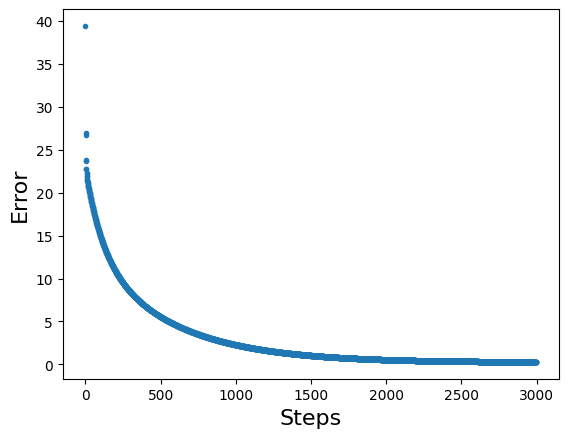

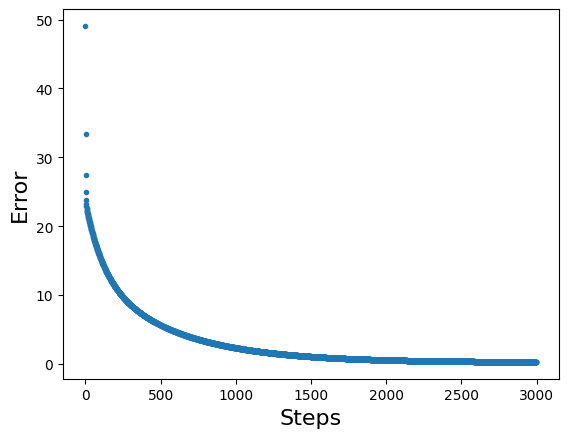

In [5]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

with torch.no_grad():
  plt.plot(loss_validation, '.') #plot the validation loss list
  ax.set_xlabel("Steps", fontsize=16)
  ax.set_ylabel("Error", fontsize=16)

  import matplotlib.pyplot as plt
  fig, ax = plt.subplots()
  ax.plot(loss_training, ".") #plot the training loss list
  ax.set_xlabel("Steps", fontsize=16)
  ax.set_ylabel("Error", fontsize=16)

# Visualize the polynomial defined by the estimate of w you obtained above, and comment.

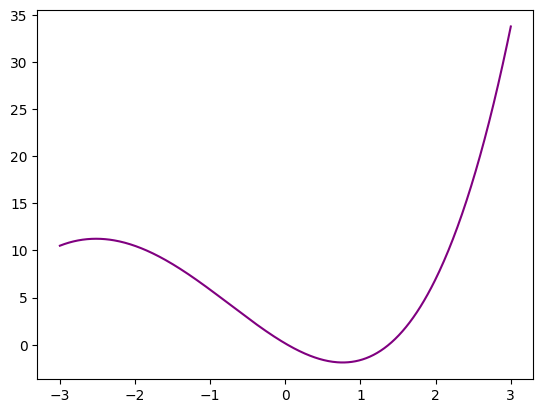

In [6]:
import torch
import torch.nn as nn 
import torch.optim as optim
import matplotlib.pyplot as plt

DEVICE = torch.device("cuda:0" if torch.cuda.is_available()
else "cpu")

model = nn.Linear(5, 1, bias = False)
model = model.to(DEVICE)
loss_fn = nn.MSELoss()
learning_rate = 0.001
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

num_steps = 3000
for step in range(num_steps):
  model.train() 
  optimizer.zero_grad() 
  y_ = model(x_train) 
  loss = loss_fn(y_, y_train) 
  
  loss.backward()  
  optimizer.step() 
  
  model.eval() 
  y_ = model(x_validate)
  val_loss = loss_fn(y_, y_validate)


  with torch.no_grad():
    def f(x):
      return 1 * model.weight[0,0].detach().numpy() + x * model.weight[0,1].detach().numpy() + x**2 * model.weight[0,2].detach().numpy() + x**3 * model.weight[0,3].detach().numpy() + x**4 * model.weight[0,4].detach().numpy()

    if(step == 2999): # we plot on the last step of the gradient iteration so we can see the final result of the w estimations
      x = np.linspace(-3, 3, 500)
      plt.plot(x, f(x), color='purple')
      plt.show()

# Report and explain what happens when the training dataset is reduced to 10 observations while keeping the number of validation data points unchanged.

C:\Users\kanha\AppData\Local\Temp\ipykernel_18436\3730382899.py:33: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  y = x.dot(w)


Initial weight values: Parameter containing:
tensor([[ 0.1202, -0.0659, -0.3946,  0.3384,  0.4115]], requires_grad=True)
Step 0: train loss: 5.0115838050842285
Step 0: val loss: 19.32400131225586
Step 1: train loss: 4.200450420379639
Step 1: val loss: 19.295101165771484
Step 2: train loss: 4.193614482879639
Step 2: val loss: 19.272890090942383
Step 3: train loss: 4.189078330993652
Step 3: val loss: 19.25110626220703
Step 4: train loss: 4.184559345245361
Step 4: val loss: 19.22983169555664
Step 5: train loss: 4.180050849914551
Step 5: val loss: 19.20906639099121
Step 6: train loss: 4.175552845001221
Step 6: val loss: 19.188800811767578
Step 7: train loss: 4.171065807342529
Step 7: val loss: 19.169034957885742
Step 8: train loss: 4.16658878326416
Step 8: val loss: 19.149770736694336
Step 9: train loss: 4.162121772766113
Step 9: val loss: 19.130996704101562
Step 10: train loss: 4.157666206359863
Step 10: val loss: 19.112714767456055
Step 11: train loss: 4.153220176696777
Step 11: val loss

Text(0, 0.5, 'y')

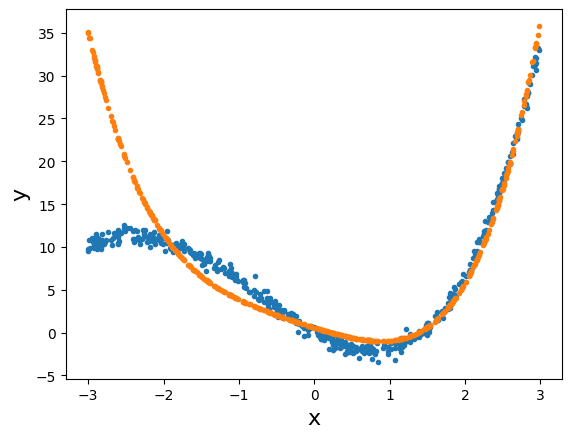

In [7]:
import torch
import torch.nn as nn 
import torch.optim as optim

DEVICE = torch.device("cuda:0" if torch.cuda.is_available()
else "cpu")

#dataset for training with 10 samples
x_train1, y_train1 = create_dataset(torch.tensor([0,-5,2,1,0.05]).T, torch.tensor([-3, 3]), 10, 0.5, 0)

#dataset for validation
x_validate1, y_validate1 = create_dataset(torch.tensor([0,-5,2,1,0.05]).T, torch.tensor([-3, 3]), 500, 0.5, 1)

model1 = nn.Linear(5, 1, bias = False) #since we are creating 2 new datasets, i performed on a new model just in case of not having probplems with re-running multiple time the same model
model1 = model1.to(DEVICE)
loss_fn = nn.MSELoss()
learning_rate = 0.001
optimizer = optim.SGD(model1.parameters(), lr=learning_rate)

sample_size = 500
x_train1 = torch.from_numpy(x_train1)
x_train1 = x_train1.float()
x_train1 = x_train1.to(DEVICE)

y_train1 = torch.from_numpy(y_train1.reshape((10, 1))).float().to(DEVICE)
x_validate1 = torch.from_numpy(x_validate1.reshape((sample_size, 5))).float().to(DEVICE)
y_validate1 = torch.from_numpy(y_validate1.reshape((sample_size, 1))).float().to(DEVICE)

num_steps = 3000

print(f"Initial weight values: {model1.weight}")

for step in range(num_steps):
  model1.train()
  optimizer.zero_grad()
  y_ = model1(x_train1)
  loss = loss_fn(y_, y_train1)
  print(f"Step {step}: train loss: {loss}")

  loss.backward()
  optimizer.step()

  model1.eval()
  with torch.no_grad():
    y_ = model1(x_validate1)
    val_loss = loss_fn(y_, y_validate1)
  
  print(f"Step {step}: val loss: {val_loss}")

print(f"Initial weight values: {model1.weight}")

fig, ax = plt.subplots()

ax.plot(x_validate1[:,1].cpu().numpy(), y_validate1.cpu().numpy(), ".")
ax.plot(x_validate1[:,1].cpu().numpy(), y_.cpu().numpy(), ".")

ax.set_xlabel("x", fontsize=16)
ax.set_ylabel("y", fontsize=16)

# Bonus: Plot the evolution of each coefficient of w as a function of the gradient descent iterations.
# This plotting was made with 500 training samples and 500 validation samples so with the initial given conditions.

In [8]:
import torch
import torch.nn as nn 
import torch.optim as optim

DEVICE = torch.device("cuda:0" if torch.cuda.is_available()
else "cpu")

model = nn.Linear(5, 1)
model = model.to(DEVICE)
loss_fn = nn.MSELoss()
learning_rate = 0.001
optimizer = optim.SGD(model.parameters(), lr=learning_rate)


num_steps = 3000
w0_evolution = []
w1_evolution = []
w2_evolution = []
w3_evolution = []
w4_evolution = []

for step in range(num_steps):
  model.train()
  optimizer.zero_grad()
  y_ = model(x_train)
  loss = loss_fn(y_, y_train)

  loss.backward()
  optimizer.step()
  w0_evolution.append(model.weight[0,0].item())
  w1_evolution.append(model.weight[0,1].item())
  w2_evolution.append(model.weight[0,2].item()) 
  w3_evolution.append(model.weight[0,3].item()) 
  w4_evolution.append(model.weight[0,4].item()) 

  model.eval()
  with torch.no_grad():
    y_ = model(x_validate)
    val_loss = loss_fn(y_, y_validate)
  

Text(0, 0.5, 'Evolution')

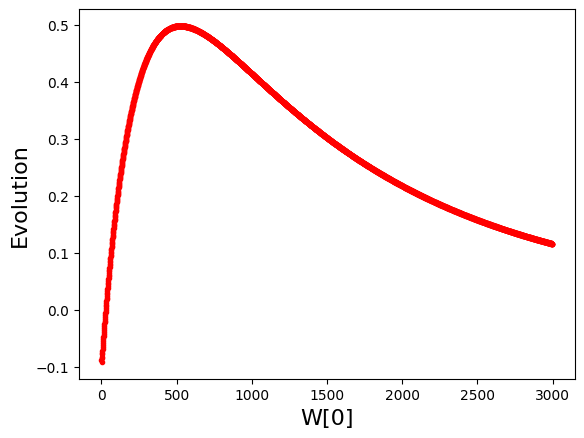

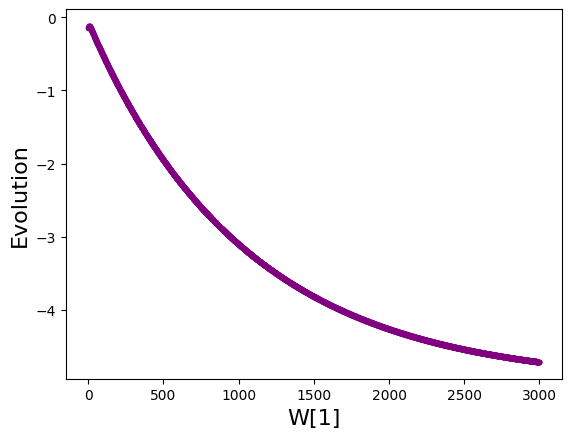

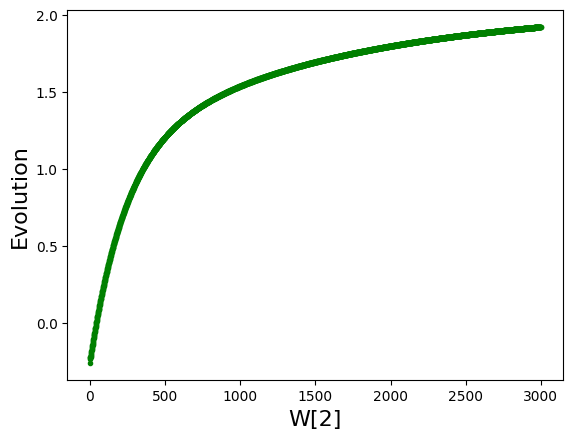

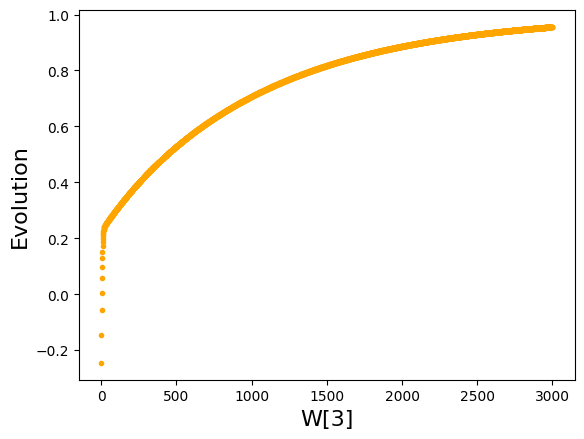

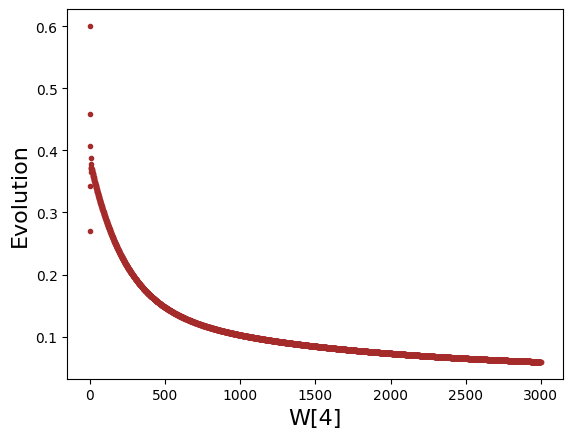

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(w0_evolution, ".", color = 'r')
ax.set_xlabel("W[0]", fontsize=16)
ax.set_ylabel("Evolution", fontsize=16)

fig, ax = plt.subplots()
ax.plot(w1_evolution, ".", color = 'purple')
ax.set_xlabel("W[1]", fontsize=16)
ax.set_ylabel("Evolution", fontsize=16)

fig, ax = plt.subplots()
ax.plot(w2_evolution, ".", color = 'green')
ax.set_xlabel("W[2]", fontsize=16)
ax.set_ylabel("Evolution", fontsize=16)

fig, ax = plt.subplots()
ax.plot(w3_evolution, ".", color = 'orange')
ax.set_xlabel("W[3]", fontsize=16)
ax.set_ylabel("Evolution", fontsize=16)

fig, ax = plt.subplots()
ax.plot(w4_evolution, ".", color = 'brown')
ax.set_xlabel("W[4]", fontsize=16)
ax.set_ylabel("Evolution", fontsize=16)